<a href="https://colab.research.google.com/github/adventnopelesihite/Intership2-BiLSTM/blob/main/BI_LSTM_Bitcoin_Price_Prediction_High_Low_Open_Close.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang dibutuhkan

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
maindf=pd.read_csv('/content/BTC-USD.csv') # masukan file input data harga bitcoin agar bisa di proses, berisi data harga 1 tahun terakhir


print('Jumlah Row: ',maindf.shape[0]) # jumlah baris yang ada pada data
print('Jumlah Columm: ',maindf.shape[1]) # jumlah kolum yang ada pada data


Jumlah Row:  366
Jumlah Columm:  7


In [ ]:
#.shape ini adalah method dari pandas yang dipakai untuk melihat bentuk dari data, 
#output (366,7) mengatakan bahwa maindf memiliki 366 baris dan 7 kolum 
maindf.shape 


(366, 7)

In [ ]:
maindf.head()#.head() adalah method dari pandas yang dipakai untuk melihat data teratas pada maindf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-11,36697.031250,37608.695313,36044.449219,37334.398438,37334.398438,3.869974e+10
1,2021-06-12,37340.144531,37408.925781,34728.191406,35552.515625,35552.515625,3.792423e+10
2,2021-06-13,35555.789063,39322.781250,34864.109375,39097.859375,39097.859375,4.066911e+10
3,2021-06-14,39016.968750,40978.363281,38757.285156,40218.476563,40218.476563,4.314891e+10
4,2021-06-15,40427.167969,41295.269531,39609.468750,40406.269531,40406.269531,4.642015e+10


In [ ]:
maindf.tail()#.tail() adalah method dari pandas yang dipakai untuk melihat data terbawah pada maindf

,Date,Open,High,Low,Close,Adj Close,Volume
361,2022-06-07,31371.742188,31489.683594,29311.683594,31155.478516,31155.478516,4.077097e+10
362,2022-06-08,31151.480469,31253.691406,29944.404297,30214.355469,30214.355469,3.024206e+10
363,2022-06-09,30215.279297,30609.310547,30020.265625,30111.998047,30111.998047,2.169200e+10
364,2022-06-10,NaN,NaN,NaN,NaN,NaN,NaN
365,2022-06-11,29084.478516,29197.939453,29084.478516,29197.939453,29197.939453,2.917454e+10


In [ ]:
maindf.info()#method info() dari pandas menampilkan info general dari maindf seperti nama columm, jenis data, jumlah data, range dan lain lain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       365 non-null    float64
 2   High       365 non-null    float64
 3   Low        365 non-null    float64
 4   Close      365 non-null    float64
 5   Adj Close  365 non-null    float64
 6   Volume     365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [ ]:
maindf.describe() #method describe dari pandas digunakan untuk mendapatkan nilai min, max,count dan berbagai jenis data statistical lainnya

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,43757.420521,44759.126097,42622.971656,43729.111778,43729.111778,3.162764e+10
std,9192.339851,9353.585393,9029.708113,9200.064282,9200.064282,9.362636e+09
min,28622.625000,28814.900391,26350.490234,28627.574219,28627.574219,1.373656e+10
25%,37748.011719,38834.617188,36733.574219,37750.453125,37750.453125,2.549315e+10
50%,42586.464844,43413.023438,41681.957031,42586.917969,42586.917969,3.106491e+10
75%,48268.855469,49347.582031,47045.003906,48199.953125,48199.953125,3.676304e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,8.419661e+10


In [ ]:
print('Null Values:',maindf.isnull().values.sum()) #bagian dari preprocessing, line kode ini akan mencari nilai null pada maindf

Null Values: 6


In [ ]:
print('NA values:',maindf.isnull().values.any()) #bagian dari preprocessing, line kode ini akan mencari nilai null pada maindf

NA values: True


In [ ]:


maindf=maindf.dropna() # bagian dari preprocessing,kode ini akan menghapus row yang berisi null/kosong/tidak ada data

print('Null Values:',maindf.isnull().values.sum())#mengecek kembali apakah data null sudah dibersihkan
print('NA values:',maindf.isnull().values.any())#mengecek kembali apakah data null sudah dibersihkan

Null Values: 0
NA values: False


In [ ]:
#bentuk akhir setelah pembersihan nilai null
maindf.shape

(365, 7)

In [ ]:
#EDA(Exploratory Data Analysis) 
# EDA dipakai untuk mengexplore dan analisis suatu data set untuk menyimpulkan karakteristik data dan juga gambaran dari data tersebut

sd=maindf.iloc[0][0] #iloc dipakai untuk mengambil data pada maindf yang berupa dataframe, [0][0] artinya iloc akan mengambil data pada baris 0 dan columm 0
ed=maindf.iloc[-1][0] # nomor negative -1 digunakan untuk mengambil satu data terakhir di columm 0, columm 0 adalah 'date'


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2021-06-11
Ending Date 2022-06-11


In [ ]:

maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d') #penyesuaian format tanggal

y_2021 = maindf.loc[(maindf['Date'] >= '2021-06-12') #ambil data pada maindf yang memiliki tanggal dari 2021-06-12 sampai 2022-06-11
                     & (maindf['Date'] < '2022-06-11')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1) #hapus columm adj close dan volume


,Date,Open,High,Low,Close
1,2021-06-12,37340.144531,37408.925781,34728.191406,35552.515625
2,2021-06-13,35555.789063,39322.781250,34864.109375,39097.859375
3,2021-06-14,39016.968750,40978.363281,38757.285156,40218.476563
4,2021-06-15,40427.167969,41295.269531,39609.468750,40406.269531
5,2021-06-16,40168.691406,40516.777344,38176.035156,38347.062500
...,...,...,...,...,...
359,2022-06-05,29835.117188,30117.744141,29574.449219,29906.662109
360,2022-06-06,29910.283203,31693.291016,29894.187500,31370.671875
361,2022-06-07,31371.742188,31489.683594,29311.683594,31155.478516
362,2022-06-08,31151.480469,31253.691406,29944.404297,30214.355469


In [ ]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean() 
#variable monthvise akan mengorganisir data berdasarkan tanggal yang ada pada variable y_2021['date'], dan di filter dengan '%B'
# agar muncul perbulan, kemudian .mean akan mencari nilai rata rata tiap bulannya.


new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December'] # penamaan ulang tiap bulan
monthvise = monthvise.reindex(new_order, axis=0) # input penamaan ulang bulan pada variable new_order, dan masukan new_order pada axis 0
monthvise #tampilkan data

,Open,Close
Date,,
January,41368.073463,41114.422379
February,40591.103934,40763.474051
March,41889.148438,41966.237525
April,41694.653646,41435.319662
May,31900.711127,31706.105217
June,33988.536342,33847.307478
July,34234.212450,34444.973790
August,45516.119834,45709.022682
September,46041.859375,45939.771484


In [ ]:
fig = go.Figure() #tampilkan data bulanan

fig.add_trace(go.Bar(
    x=monthvise.index, # ini berisi data bulan
    y=monthvise['Open'], # ini berisi data mean tiap bulan untuk columm 'open'
    name='Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index, # ini berisi data bulan
    y=monthvise['Close'], # ini berisi data mean tiap bulan untuk columm 'close'
    name='Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Perbandingan harga open dan close bulanan')
fig.show()

In [ ]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
#mengorganisir data berdasarkan tanggal yang ada pada y_2021['date'], kemudian filter berdasarkan bulan dan tampilkan nilai #terendah menggunakan method min() pada kolumm low

monthvise_high = y_2021.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
#mengorganisir data berdasarkan tanggal yang ada pada y_2021['date'], kemudian filter berdasarkan bulan dan tampilkan nilai 
#tertinggi menggunakan method max() pada kolumm 'low'

monthvise_high = monthvise_high.reindex(new_order, axis=0)
#organisair data dengan penamaan bulan yang bersumber dari new_order, dan masukan penamaan bulan baru itu ke index 0

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
#mengorganisir data berdasarkan tanggal yang ada pada y_2021['date'], kemudian filter berdasarkan bulan dan tampilkan nilai #terendah menggunakan method min() pada kolumm low
monthvise_low = monthvise_low.reindex(new_order, axis=0)
#organisair data dengan penamaan bulan yang bersumber dari new_order, dan masukan penamaan bulan baru itu ke index 0

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index, #ini isinya bulan
    y=monthvise_high, #ini isinya nilai tertinggi pada setiap bulan
    name='Harga Tinggi',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index, #ini isinya bulan
    y=monthvise_low, #ini isinya nilai terendah pada setiap bulan
    name='Harga Rendah',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Harga tinggi dan rendah tiap bulan')
fig.show()

In [ ]:
names = cycle(['Harga Open ','Harga Close ','Harga High','Harga Low '])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'], 
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Tanggal','value':'Harga'})
fig.update_layout(title_text='Chart analisis harga', font_size=15, font_color='black',legend_title_text=' Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
#mencoba untuk predict harga close

closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (365, 2)


In [ ]:
#mencoba untuk predict harga open

Opendf = maindf[['Date','Open']]
print("Shape of Open dataframe:", Opendf.shape)

Shape of Open dataframe: (365, 2)


In [ ]:
#mencoba untuk predict harga High

Highdf = maindf[['Date','High']]
print("Shape of High dataframe:", Highdf.shape)

Shape of High dataframe: (365, 2)


In [ ]:
#mencoba untuk predict harga Low

Lowdf = maindf[['Date','Low']]
print("Shape of Low dataframe:", Lowdf.shape)

Shape of Low dataframe: (365, 2)


In [ ]:
#tampilkan chart harga close dalam satu tahun terakhir
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Tanggal','close':'Harga Close'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Harga close Bitcoin selama 1 tahun terakhir ', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
#tampilkan chart harga open dalam satu tahun terakhir
fig = px.line(Opendf, x=Opendf.Date, y=Opendf.Open,labels={'date':'Tanggal','open':'Harga Close'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange',line=dict(color="#00FF00") )
fig.update_layout(title_text='Harga open Bitcoin selama 1 tahun terakhir ', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
#tampilkan chart harga High dalam satu tahun terakhir
fig = px.line(Highdf, x=Highdf.Date, y=Highdf.High,labels={'date':'Tanggal','High':'Harga Close'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange',line=dict(color="#34eba4") )
fig.update_layout(title_text='Harga High Bitcoin selama 1 tahun terakhir ', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
#tampilkan chart harga Low dalam satu tahun terakhir
fig = px.line(Lowdf, x=Lowdf.Date, y=Lowdf.Low,labels={'date':'Tanggal','Low':'Harga Close'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange',line=dict(color="#fe410f") )
fig.update_layout(title_text='Harga Low Bitcoin selama 1 tahun terakhir ', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedf #
close_stock = closedf.copy() #close_stock dipakai untuk menyimpan value asli, karena closedf akan di proses datanya

In [ ]:
Opendf
Open_stock = Opendf.copy()#open_df dipakai untuk menyimpan value asli, karena opendf akan di proses datanya

In [ ]:
Highdf
High_stock = Highdf.copy()#High_df dipakai untuk menyimpan value asli, karena Highdf akan di proses datanya

In [ ]:
Lowdf
Low_stock = Lowdf.copy()#Low_df dipakai untuk menyimpan value asli, karena Lowdf akan di proses datanya

In [ ]:
# Hapus columm date pada closedf dan 
# persiapan pre-processing dengan menyederhanakan data dalam skala 0-1

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)
#print(closedf) gunakan ini untuk melihat data closedf yang telah di pre-processing menggunakan minmaxscaler

(365, 1)


In [ ]:
# Hapus columm date pada Opendf dan 
# persiapan pre-processing dengan menyederhanakan data dalam skala 0-1

del Opendf['Date']
scaler_Opendf=MinMaxScaler(feature_range=(0,1))
Opendf=scaler_Opendf.fit_transform(np.array(Opendf).reshape(-1,1))
print(Opendf.shape)
#print(Opendf) gunakan ini untuk melihat data Opendf yang telah di pre-processing menggunakan minmaxscaler

(365, 1)


In [ ]:
# Hapus columm date pada Highdf dan 
# persiapan pre-processing dengan menyederhanakan data dalam skala 0-1

del Highdf['Date']
scaler_Highdf=MinMaxScaler(feature_range=(0,1))
Highdf=scaler_Highdf.fit_transform(np.array(Highdf).reshape(-1,1))
print(Highdf.shape)
#print(Highdf) gunakan ini untuk melihat data Highdf yang telah di pre-processing menggunakan minmaxscaler

(365, 1)


In [ ]:
# Hapus columm date pada Lowdf dan 
# persiapan pre-processing dengan menyederhanakan data dalam skala 0-1

del Lowdf['Date']
scaler_Lowdf=MinMaxScaler(feature_range=(0,1))
Lowdf=scaler_Lowdf.fit_transform(np.array(Lowdf).reshape(-1,1))
print(Lowdf.shape)
#print(Lowdf) gunakan ini untuk melihat data Lowdf yang telah di pre-processing menggunakan minmaxscaler

(365, 1)


In [ ]:
# split data training menjadi 80% dan data testing menjadi 20%
training_size=int(len(closedf)*0.80) #variable training_size akan diisi berdasarkan panjang dari dataframe closedf dikali 0.80
test_size=len(closedf)-training_size # variable test_size akan diisi berdasarkan panjang dataframe closedf dikurangi nilai dari training-size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1] #train_data akan diisi b
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
#print("train_data: ", train_data) pakai ini untuk lihat train_data yang telah mengambil data dari closedf sebanyak 80%
#print("test_data: ", test_data) pakai ini untuk lihat test_data yang telah mengambil data dari closedf sebanyak 20%

train_data:  (292, 1)
test_data:  (73, 1)


In [ ]:
# split data training menjadi 80% dan data testing menjadi 20%
training_size_opendf=int(len(Opendf)*0.80) #variable training_size_opendf akan diisi berdasarkan panjang dari dataframe Opendf dikali 0.80
test_size_opendf=len(Opendf)-training_size_opendf # variable test_size_opendf akan diisi berdasarkan panjang dataframe Opendf dikurangi nilai dari training-size
train_data_opendf,test_data_opendf=Opendf[0:training_size_opendf,:],Opendf[training_size_opendf:len(Opendf),:1] #train_data_opendf akan diisi b
print("train_data_opendf: ", train_data_opendf.shape)
print("test_data_opendf: ", test_data_opendf.shape)
#print("train_data_opendf: ", train_data_opendf) pakai ini untuk lihat train_data_opendf yang telah mengambil data dari Opendf sebanyak 80%
#print("test_data_opendf: ", test_data_opendf) pakai ini untuk lihat test_data_opendf yang telah mengambil data dari Opendf sebanyak 20%

train_data_opendf:  (292, 1)
test_data_opendf:  (73, 1)


In [ ]:
# split data training menjadi 80% dan data testing menjadi 20%
training_size_Highdf=int(len(Highdf)*0.80) #variable training_size_Highdf akan diisi berdasarkan panjang dari dataframe Highdf dikali 0.80
test_size_Highdf=len(Highdf)-training_size_Highdf # variable test_size_Highdf akan diisi berdasarkan panjang dataframe Highdf dikurangi nilai dari training-size
train_data_Highdf,test_data_Highdf=Highdf[0:training_size_Highdf,:],Highdf[training_size_Highdf:len(Highdf),:1] #train_data_Highdf akan diisi b
print("train_data_Highdf: ", train_data_Highdf.shape)
print("test_data_Highdf: ", test_data_Highdf.shape)
#print("train_data_Highdf: ", train_data_Highdf) pakai ini untuk lihat train_data_Highdf yang telah mengambil data dari Highdf sebanyak 80%
#print("test_data_Highdf: ", test_data_Highdf) pakai ini untuk lihat test_data_Highdf yang telah mengambil data dari Highdf sebanyak 20%

train_data_Highdf:  (292, 1)
test_data_Highdf:  (73, 1)


In [ ]:
# split data training menjadi 80% dan data testing menjadi 20%
training_size_Lowdf=int(len(Lowdf)*0.80) #variable training_size_Lowdf akan diisi berdasarkan panjang dari dataframe Lowdf dikali 0.80
test_size_Lowdf=len(Lowdf)-training_size_Lowdf # variable test_size_Lowdf akan diisi berdasarkan panjang dataframe Lowdf dikurangi nilai dari training-size
train_data_Lowdf,test_data_Lowdf=Lowdf[0:training_size_Lowdf,:],Lowdf[training_size_Lowdf:len(Lowdf),:1] #train_data_Lowdf akan diisi b
print("train_data_Lowdf: ", train_data_Lowdf.shape)
print("test_data_Lowdf: ", test_data_Lowdf.shape)
#print("train_data_Lowdf: ", train_data_Lowdf) pakai ini untuk lihat train_data_Lowdf yang telah mengambil data dari Lowdf sebanyak 80%
#print("test_data_Lowdf: ", test_data_Lowdf) pakai ini untuk lihat test_data_Lowdf yang telah mengambil data dari Lowdf sebanyak 20%

train_data_Lowdf:  (292, 1)
test_data_Lowdf:  (73, 1)


In [ ]:
# method create_data set dipakai untuk konversi array menjadi matrix, agar dapat dimengerti oleh LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step) # X_train dan y_train
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
#print("X_train: ", X_train) print ini untuk melihat matrix
#print("y_train: ", y_train)print ini untuk melihat matrix
#print("X_test: ", X_test)print ini untuk melihat matrix
#print("y_test", y_test)print ini untuk melihat matrix

X_train:  (276, 15)
y_train:  (276,)
X_test:  (57, 15)
y_test (57,)


In [ ]:
time_step_opendf = 15
X_train_opendf, y_train_opendf = create_dataset(train_data_opendf, time_step_opendf) # X_train_opendf dan y_train_opendf
X_test_opendf, y_test_opendf = create_dataset(test_data_opendf, time_step_opendf)

print("X_train_opendf: ", X_train_opendf.shape)
print("y_train_opendf: ", y_train_opendf.shape)
print("X_test_opendf: ", X_test_opendf.shape)
print("y_test_opendf", y_test_opendf.shape)
#print("X_train_opendf: ", X_train_opendf) print ini untuk melihat matrix
#print("y_train_opendf: ", y_train_opendf)print ini untuk melihat matrix
#print("X_test_opendf: ", X_test_opendf)print ini untuk melihat matrix
#print("y_test_opendf", y_test_opendf)print ini untuk melihat matrix

X_train_opendf:  (276, 15)
y_train_opendf:  (276,)
X_test_opendf:  (57, 15)
y_test_opendf (57,)


In [ ]:
time_step_Highdf = 15
X_train_Highdf, y_train_Highdf = create_dataset(train_data_Highdf, time_step_Highdf) # X_train_Highdf dan y_train_Highdf
X_test_Highdf, y_test_Highdf = create_dataset(test_data_Highdf, time_step_Highdf)

print("X_train_Highdf: ", X_train_Highdf.shape)
print("y_train_Highdf: ", y_train_Highdf.shape)
print("X_test_Highdf: ", X_test_Highdf.shape)
print("y_test_Highdf", y_test_Highdf.shape)
#print("X_train_Highdf: ", X_train_Highdf) print ini untuk melihat matrix
#print("y_train_Highdf: ", y_train_Highdf)print ini untuk melihat matrix
#print("X_test_Highdf: ", X_test_Highdf)print ini untuk melihat matrix
#print("y_test_Highdf", y_test_Highdf)print ini untuk melihat matrix

X_train_Highdf:  (276, 15)
y_train_Highdf:  (276,)
X_test_Highdf:  (57, 15)
y_test_Highdf (57,)


In [ ]:
time_step_Lowdf = 15
X_train_Lowdf, y_train_Lowdf = create_dataset(train_data_Lowdf, time_step_Lowdf) # X_train_Lowdf dan y_train_Lowdf
X_test_Lowdf, y_test_Lowdf = create_dataset(test_data_Lowdf, time_step_Lowdf)

print("X_train_Lowdf: ", X_train_Lowdf.shape)
print("y_train_Lowdf: ", y_train_Lowdf.shape)
print("X_test_Lowdf: ", X_test_Lowdf.shape)
print("y_test_Lowdf", y_test_Lowdf.shape)
#print("X_train_Lowdf: ", X_train_Lowdf) print ini untuk melihat matrix
#print("y_train_Lowdf: ", y_train_Lowdf)print ini untuk melihat matrix
#print("X_test_Lowdf: ", X_test_Lowdf)print ini untuk melihat matrix
#print("y_test_Lowdf", y_test_Lowdf)print ini untuk melihat matrix

X_train_Lowdf:  (276, 15)
y_train_Lowdf:  (276,)
X_test_Lowdf:  (57, 15)
y_test_Lowdf (57,)


In [ ]:
# penyesuaian input yang akand dipakai berdasarkan format LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

# print("X_train: ", X_train) print ini untuk lihat data yang sudah dikonversi menyesuaikan format data yang sesuai dengan LSTM
#print("X_test: ", X_test.shape)



X_train:  (276, 15, 1)
X_test:  (57, 15, 1)


In [ ]:
# penyesuaian input yang akand dipakai berdasarkan format LSTM
X_train_opendf =X_train_opendf.reshape(X_train_opendf.shape[0],X_train_opendf.shape[1] , 1)
X_test_opendf = X_test_opendf.reshape(X_test_opendf.shape[0],X_test_opendf.shape[1] , 1)

print("X_train_opendf: ", X_train_opendf.shape)
print("X_test_opendf: ", X_test_opendf.shape)

# print("X_train_opendf: ", X_train_opendf) print ini untuk lihat data yang sudah dikonversi menyesuaikan format data yang sesuai dengan LSTM
#print("X_test_opendf: ", X_test_opendf.shape)



X_train_opendf:  (276, 15, 1)
X_test_opendf:  (57, 15, 1)


In [ ]:
# penyesuaian input yang akand dipakai berdasarkan format LSTM
X_train_Highdf =X_train_Highdf.reshape(X_train_Highdf.shape[0],X_train_Highdf.shape[1] , 1)
X_test_Highdf = X_test_Highdf.reshape(X_test_Highdf.shape[0],X_test_Highdf.shape[1] , 1)

print("X_train_Highdf: ", X_train_Highdf.shape)
print("X_test_Highdf: ", X_test_Highdf.shape)

# print("X_train_Highdf: ", X_train_Highdf) print ini untuk lihat data yang sudah dikonversi menyesuaikan format data yang sesuai dengan LSTM
#print("X_test_Highdf: ", X_test_Highdf.shape)



X_train_Highdf:  (276, 15, 1)
X_test_Highdf:  (57, 15, 1)


In [ ]:
# penyesuaian input yang akand dipakai berdasarkan format LSTM
X_train_Lowdf =X_train_Lowdf.reshape(X_train_Lowdf.shape[0],X_train_Lowdf.shape[1] , 1)
X_test_Lowdf = X_test_Lowdf.reshape(X_test_Lowdf.shape[0],X_test_Lowdf.shape[1] , 1)

print("X_train_Lowdf: ", X_train_Lowdf.shape)
print("X_test_Lowdf: ", X_test_Lowdf.shape)

# print("X_train_Lowdf: ", X_train_Lowdf) print ini untuk lihat data yang sudah dikonversi menyesuaikan format data yang sesuai dengan LSTM
#print("X_test_Lowdf: ", X_test_Lowdf.shape)



X_train_Lowdf:  (276, 15, 1)
X_test_Lowdf:  (57, 15, 1)


In [ ]:
# Pembuatan Model LSTM
model=Sequential()
model.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
# use early stop to avoid over-fiting 
from tensorflow.keras.callbacks import EarlyStopping

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
 #       verbose=1, mode='auto', restore_best_weights=True)

In [ ]:
# Pembuatan Model_opendf LSTM
model_opendf=Sequential()
model_opendf.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu

model_opendf.add(Dense(1))
model_opendf.compile(loss="mean_squared_error", optimizer="adam")
# use early stop to avoid over-fiting 
from tensorflow.keras.callbacks import EarlyStopping

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
 #       verbose=1, mode='auto', restore_best_weights=True) 

In [ ]:
# Pembuatan Model_Highdf LSTM
model_Highdf=Sequential()
model_Highdf.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu

model_Highdf.add(Dense(1))
model_Highdf.compile(loss="mean_squared_error", optimizer="adam")
# use early stop to avoid over-fiting 

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
 #       verbose=1, mode='auto', restore_best_weights=True) 

In [ ]:
# Pembuatan Model_Lowdf LSTM
model_Lowdf=Sequential()
model_Lowdf.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu

model_Lowdf.add(Dense(1))
model_Lowdf.compile(loss="mean_squared_error", optimizer="adam")
# use early stop to avoid over-fiting 
from tensorflow.keras.callbacks import EarlyStopping

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
 #       verbose=1, mode='auto', restore_best_weights=True) 

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=50,verbose=1)
#train model sebanyak 200 kali

Epoch 1/100
6/6 [==============================] - 3s 95ms/step - loss: 0.2086 - val_loss: 0.0113
Epoch 2/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0862 - val_loss: 0.0075
Epoch 3/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0172 - val_loss: 0.0358
Epoch 4/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0201 - val_loss: 0.0283
Epoch 5/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0096 - val_loss: 0.0116
Epoch 6/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0117 - val_loss: 0.0123
Epoch 7/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0088 - val_loss: 0.0179
Epoch 8/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0085 - val_loss: 0.0152
Epoch 9/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0076 - val_loss: 0.0102
Epoch 10/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0075 - val_loss: 0.0099
Epoch 11/100
6/6 [=

In [ ]:
history_opendf = model_opendf.fit(X_train_opendf,y_train_opendf,validation_data=(X_test_opendf,y_test_opendf),epochs=50,batch_size=50,verbose=1)


Epoch 1/50
6/6 [==============================] - 3s 97ms/step - loss: 0.1752 - val_loss: 0.0086
Epoch 2/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0568 - val_loss: 0.0146
Epoch 3/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0182 - val_loss: 0.0425
Epoch 4/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0187 - val_loss: 0.0182
Epoch 5/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0114 - val_loss: 0.0100
Epoch 6/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0131 - val_loss: 0.0125
Epoch 7/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0096 - val_loss: 0.0160
Epoch 8/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0089 - val_loss: 0.0124
Epoch 9/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 10/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0082 - val_loss: 0.0099
Epoch 11/50
6/6 [============

In [ ]:
history_Highdf = model_Highdf.fit(X_train_Highdf,y_train_Highdf,validation_data=(X_test_Highdf,y_test_Highdf),epochs=50,batch_size=50,verbose=1)


Epoch 1/50
6/6 [==============================] - 3s 93ms/step - loss: 0.2224 - val_loss: 0.0126
Epoch 2/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0962 - val_loss: 0.0073
Epoch 3/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0173 - val_loss: 0.0414
Epoch 4/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0232 - val_loss: 0.0315
Epoch 5/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0100 - val_loss: 0.0130
Epoch 6/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0129 - val_loss: 0.0128
Epoch 7/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0100 - val_loss: 0.0192
Epoch 8/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0087 - val_loss: 0.0180
Epoch 9/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0077 - val_loss: 0.0110
Epoch 10/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0075 - val_loss: 0.0097
Epoch 11/50
6/6 [============

In [ ]:
history_Lowdf = model_Lowdf.fit(X_train_Lowdf,y_train_Lowdf,validation_data=(X_test_Lowdf,y_test_Lowdf),epochs=50,batch_size=50,verbose=1)


Epoch 1/50
6/6 [==============================] - 3s 95ms/step - loss: 0.2019 - val_loss: 0.0120
Epoch 2/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0718 - val_loss: 0.0117
Epoch 3/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0173 - val_loss: 0.0474
Epoch 4/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0181 - val_loss: 0.0203
Epoch 5/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0108 - val_loss: 0.0112
Epoch 6/50
6/6 [==============================] - 0s 30ms/step - loss: 0.0121 - val_loss: 0.0132
Epoch 7/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0093 - val_loss: 0.0192
Epoch 8/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0091 - val_loss: 0.0177
Epoch 9/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0082 - val_loss: 0.0118
Epoch 10/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0081 - val_loss: 0.0106
Epoch 11/50
6/6 [============

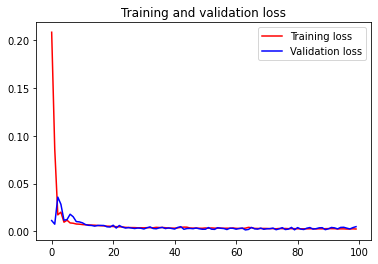

<Figure size 432x288 with 0 Axes>

In [ ]:
# output loss dan val_loss dari model LSTM, chart ini digunakan untuk mencari nilai epoch untuk mengoptimasi dan mencari nilai epoch yang tepat
# nilai epoch yang tepat adalah nilai yang didapatkan dari lamanya waktu training dan akurasi yang didapatkan
# jadi, nilai epoch yang tepat adalah nilai epoch yang terkecil, namun tetap menghasilkan akurasi yang tinggi
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

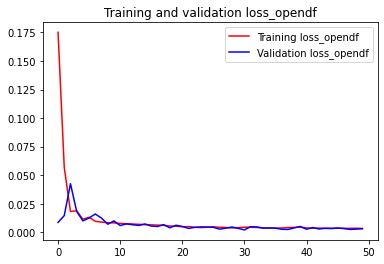

<Figure size 432x288 with 0 Axes>

In [ ]:
# output loss dan val_loss dari model LSTM, chart ini digunakan untuk mencari nilai epoch untuk mengoptimasi dan mencari nilai epoch yang tepat
# nilai epoch yang tepat adalah nilai yang didapatkan dari lamanya waktu training dan akurasi yang didapatkan
# jadi, nilai epoch yang tepat adalah nilai epoch yang terkecil, namun tetap menghasilkan akurasi yang tinggi
import matplotlib.pyplot as plt

loss_opendf = history_opendf.history['loss']
val_loss_opendf = history_opendf.history['val_loss']

epochs = range(len(loss_opendf))

plt.plot(epochs, loss_opendf, 'r', label='Training loss_opendf')
plt.plot(epochs, val_loss_opendf, 'b', label='Validation loss_opendf')
plt.title('Training and validation loss_opendf')
plt.legend(loc=0)
plt.figure()


plt.show()

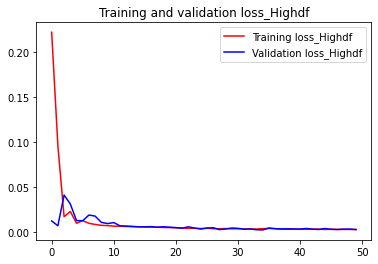

<Figure size 432x288 with 0 Axes>

In [ ]:
# output loss dan val_loss dari model LSTM, chart ini digunakan untuk mencari nilai epoch untuk mengoptimasi dan mencari nilai epoch yang tepat
# nilai epoch yang tepat adalah nilai yang didapatkan dari lamanya waktu training dan akurasi yang didapatkan
# jadi, nilai epoch yang tepat adalah nilai epoch yang terkecil, namun tetap menghasilkan akurasi yang tinggi
import matplotlib.pyplot as plt

loss_Highdf = history_Highdf.history['loss']
val_loss_Highdf = history_Highdf.history['val_loss']

epochs = range(len(loss_Highdf))

plt.plot(epochs, loss_Highdf, 'r', label='Training loss_Highdf')
plt.plot(epochs, val_loss_Highdf, 'b', label='Validation loss_Highdf')
plt.title('Training and validation loss_Highdf')
plt.legend(loc=0)
plt.figure()


plt.show()

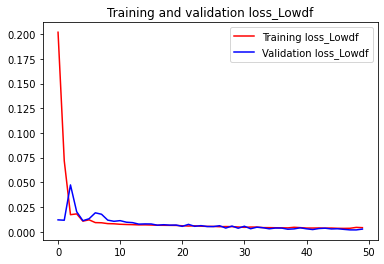

<Figure size 432x288 with 0 Axes>

In [ ]:
# output loss dan val_loss dari model LSTM, chart ini digunakan untuk mencari nilai epoch untuk mengoptimasi dan mencari nilai epoch yang tepat
# nilai epoch yang tepat adalah nilai yang didapatkan dari lamanya waktu training dan akurasi yang didapatkan
# jadi, nilai epoch yang tepat adalah nilai epoch yang terkecil, namun tetap menghasilkan akurasi yang tinggi
import matplotlib.pyplot as plt

loss_Lowdf = history_Lowdf.history['loss']
val_loss_Lowdf = history_Lowdf.history['val_loss']

epochs = range(len(loss_Lowdf))

plt.plot(epochs, loss_Lowdf, 'r', label='Training loss_Lowdf')
plt.plot(epochs, val_loss_Lowdf, 'b', label='Validation loss_Lowdf')
plt.title('Training and validation loss_Lowdf')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### lakukan predict menggunakan x_train dan X_test
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((276, 1), (57, 1))

In [ ]:
### lakukan predict menggunakan x_train_opendf dan X_test_opendf
train_predict_opendf=model_opendf.predict(X_train_opendf)
test_predict_opendf=model_opendf.predict(X_test_opendf)
train_predict_opendf.shape, test_predict_opendf.shape

((276, 1), (57, 1))

In [ ]:
### lakukan predict menggunakan x_train_Highdf dan X_test_Highdf
train_predict_Highdf=model_Highdf.predict(X_train_Highdf)
test_predict_Highdf=model_Highdf.predict(X_test_Highdf)
train_predict_Highdf.shape, test_predict_Highdf.shape

((276, 1), (57, 1))

In [ ]:
### lakukan predict menggunakan x_train_Lowdf dan X_test_Lowdf
train_predict_Lowdf=model_Lowdf.predict(X_train_Lowdf)
test_predict_Lowdf=model_Lowdf.predict(X_test_Lowdf)
train_predict_Lowdf.shape, test_predict_Lowdf.shape

((276, 1), (57, 1))

In [ ]:
# ubah nilai hasil predict ke value sebelumyna dengan menggunakan inverse, agar dapat diukur tingkat akurasi dan perfomance

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 


In [ ]:
# ubah nilai hasil predict ke value sebelumyna dengan menggunakan inverse, agar dapat diukur tingkat akurasi dan perfomance

train_predict_opendf = scaler.inverse_transform(train_predict_opendf)
test_predict_opendf = scaler.inverse_transform(test_predict_opendf)
original_ytrain_opendf = scaler.inverse_transform(y_train_opendf.reshape(-1,1)) 
original_ytest_opendf = scaler.inverse_transform(y_test_opendf.reshape(-1,1)) 

In [ ]:
# ubah nilai hasil predict ke value sebelumyna dengan menggunakan inverse, agar dapat diukur tingkat akurasi dan perfomance

train_predict_Highdf = scaler.inverse_transform(train_predict_Highdf)
test_predict_Highdf = scaler.inverse_transform(test_predict_Highdf)
original_ytrain_Highdf = scaler.inverse_transform(y_train_Highdf.reshape(-1,1)) 
original_ytest_Highdf = scaler.inverse_transform(y_test_Highdf.reshape(-1,1)) 

In [ ]:
# ubah nilai hasil predict ke value sebelumyna dengan menggunakan inverse, agar dapat diukur tingkat akurasi dan perfomance

train_predict_Lowdf = scaler.inverse_transform(train_predict_Lowdf)
test_predict_Lowdf = scaler.inverse_transform(test_predict_Lowdf)
original_ytrain_Lowdf = scaler.inverse_transform(y_train_Lowdf.reshape(-1,1)) 
original_ytest_Lowdf = scaler.inverse_transform(y_test_Lowdf.reshape(-1,1)) 

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

#https://stephenallwright.com/good-rmse-score/ referensi untuk melihat nilai rmse yang bagus itu seperti apa
#artikel pada link diatas mengatakan bahwa apabila nilai rmse 1000, tapi data yang dianalisis adalah data expekstasi tingkat kehidupan seseorang,
#maka nilai RMSE itu sangat tidak akurat, sedangkan apabila nilai rmse 1000, tapi data yang dianalisis adalah harga rumah dengan nominal $100.000, 
# maka nilai RMSE itu cukup akurat
#nilai rmse cukup kecil yang berarti akurasi lumayan bagus

Train data RMSE:  2028.9618277902753
Train data MSE:  4116686.0986300544
Train data MAE:  1557.0447661467394
-------------------------------------------------------------------------------------
Test data RMSE:  2714.7703158522177
Test data MSE:  7369977.867832351
Test data MAE:  2362.96083466886


In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE opendf: ", math.sqrt(mean_squared_error(original_ytrain_opendf,train_predict_opendf)))
print("Train data MSE opendf: ", mean_squared_error(original_ytrain_opendf,train_predict_opendf))
print("Train data MAE opendf: ", mean_absolute_error(original_ytrain_opendf,train_predict_opendf))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE opendf: ", math.sqrt(mean_squared_error(original_ytest_opendf,test_predict_opendf)))
print("Test data MSE opendf: ", mean_squared_error(original_ytest_opendf,test_predict_opendf))
print("Test data MAE opendf: ", mean_absolute_error(original_ytest_opendf,test_predict_opendf))

#https://stephenallwright.com/good-rmse-score/ referensi untuk melihat nilai rmse yang bagus itu seperti apa
#artikel pada link diatas mengatakan bahwa apabila nilai rmse 1000, tapi data yang dianalisis adalah data expekstasi tingkat kehidupan seseorang,
#maka nilai RMSE itu sangat tidak akurat, sedangkan apabila nilai rmse 1000, tapi data yang dianalisis adalah harga rumah dengan nominal $100.000, 
# maka nilai RMSE itu cukup akurat
#nilai rmse cukup kecil yang berarti akurasi lumayan bagus

Train data RMSE opendf:  2211.4642472943087
Train data MSE opendf:  4890574.117060983
Train data MAE opendf:  1777.4314129691315
-------------------------------------------------------------------------------------
Test data RMSE opendf:  2152.919905959341
Test data MSE opendf:  4635064.121475978
Test data MAE opendf:  1705.40221917143


In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE Highdf: ", math.sqrt(mean_squared_error(original_ytrain_Highdf,train_predict_Highdf)))
print("Train data MSE Highdf: ", mean_squared_error(original_ytrain_Highdf,train_predict_Highdf))
print("Train data MAE Highdf: ", mean_absolute_error(original_ytrain_Highdf,train_predict_Highdf))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE Highdf: ", math.sqrt(mean_squared_error(original_ytest_Highdf,test_predict_Highdf)))
print("Test data MSE Highdf: ", mean_squared_error(original_ytest_Highdf,test_predict_Highdf))
print("Test data MAE Highdf: ", mean_absolute_error(original_ytest_Highdf,test_predict_Highdf))

#https://stephenallwright.com/good-rmse-score/ referensi untuk melihat nilai rmse yang bagus itu seperti apa
#artikel pada link diatas mengatakan bahwa apabila nilai rmse 1000, tapi data yang dianalisis adalah data expekstasi tingkat kehidupan seseorang,
#maka nilai RMSE itu sangat tidak akurat, sedangkan apabila nilai rmse 1000, tapi data yang dianalisis adalah harga rumah dengan nominal $100.000, 
# maka nilai RMSE itu cukup akurat
#nilai rmse cukup kecil yang berarti akurasi lumayan bagus

Train data RMSE Highdf:  2163.3563206300823
Train data MSE Highdf:  4680110.570010128
Train data MAE Highdf:  1721.84825309981
-------------------------------------------------------------------------------------
Test data RMSE Highdf:  2162.182823356628
Test data MSE Highdf:  4675034.561618439
Test data MAE Highdf:  1798.173876090903


In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE Lowdf: ", math.sqrt(mean_squared_error(original_ytrain_Lowdf,train_predict_Lowdf)))
print("Train data MSE Lowdf: ", mean_squared_error(original_ytrain_Lowdf,train_predict_Lowdf))
print("Train data MAE Lowdf: ", mean_absolute_error(original_ytrain_Lowdf,train_predict_Lowdf))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE Lowdf: ", math.sqrt(mean_squared_error(original_ytest_Lowdf,test_predict_Lowdf)))
print("Test data MSE Lowdf: ", mean_squared_error(original_ytest_Lowdf,test_predict_Lowdf))
print("Test data MAE Lowdf: ", mean_absolute_error(original_ytest_Lowdf,test_predict_Lowdf))

#https://stephenallwright.com/good-rmse-score/ referensi untuk melihat nilai rmse yang bagus itu seperti apa
#artikel pada link diatas mengatakan bahwa apabila nilai rmse 1000, tapi data yang dianalisis adalah data expekstasi tingkat kehidupan seseorang,
#maka nilai RMSE itu sangat tidak akurat, sedangkan apabila nilai rmse 1000, tapi data yang dianalisis adalah harga rumah dengan nominal $100.000, 
# maka nilai RMSE itu cukup akurat
#nilai rmse cukup kecil yang berarti akurasi lumayan bagus

Train data RMSE Lowdf:  2220.288499444521
Train data MSE Lowdf:  4929681.0207656035
Train data MAE Lowdf:  1712.0743667327972
-------------------------------------------------------------------------------------
Test data RMSE Lowdf:  2021.9733239733325
Test data MSE Lowdf:  4088376.1228597667
Test data MAE Lowdf:  1366.4837960537586


In [ ]:
#Variance Regression Score
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))
#variance adalah alat ukur untuk mengetahui perbedaan value yang dianalisis dengan value yang diprediksi
# semakin mendekati nilai 1.0, maka semakin akurat model yang dibuat


Train data explained variance regression score: 0.9535864081627621
Test data explained variance regression score: 0.9111671069103674


In [ ]:
#Variance Regression Score
print("Train data explained variance regression score opendf:", 
      explained_variance_score(original_ytrain_opendf, train_predict_opendf))
print("Test data explained variance regression score opendf:", 
      explained_variance_score(original_ytest_opendf, test_predict_opendf))
#variance adalah alat ukur untuk mengetahui perbedaan value yang dianalisis dengan value yang diprediksi
# semakin mendekati nilai 1.0, maka semakin akurat model yang dibuat

Train data explained variance regression score opendf: 0.9368151860340636
Test data explained variance regression score opendf: 0.906342879533941


In [ ]:
#Variance Regression Score
print("Train data explained variance regression score Highdf:", 
      explained_variance_score(original_ytrain_Highdf, train_predict_Highdf))
print("Test data explained variance regression score Highdf:", 
      explained_variance_score(original_ytest_Highdf, test_predict_Highdf))
#variance adalah alat ukur untuk mengetahui perbedaan value yang dianalisis dengan value yang diprediksi
# semakin mendekati nilai 1.0, maka semakin akurat model yang dibuat

Train data explained variance regression score Highdf: 0.9386350552855544
Test data explained variance regression score Highdf: 0.9065888188744857


In [ ]:
#Variance Regression Score
print("Train data explained variance regression score Lowdf:", 
      explained_variance_score(original_ytrain_Lowdf, train_predict_Lowdf))
print("Test data explained variance regression score Lowdf:", 
      explained_variance_score(original_ytest_Lowdf, test_predict_Lowdf))
#variance adalah alat ukur untuk mengetahui perbedaan value yang dianalisis dengan value yang diprediksi
# semakin mendekati nilai 1.0, maka semakin akurat model yang dibuat

Train data explained variance regression score Lowdf: 0.9294065046947588
Test data explained variance regression score Lowdf: 0.8798478471554191


In [ ]:
# R square score for regression
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

#r2_square akan mencari tingkat akurasi dari model LSTM
#misal 
# y adalah actual value
# f adalah predicted value
#y = [10, 20, 30]
#f = [30, 10, 20]
# kalau ini dihitung dengan r2_score, nilainya akan -2, karena hasil prediksi tidak ada yang menebak dengan benar

Train data R2 score: 0.946041984825616
Test data R2 score: 0.6623116877264349


In [ ]:
# R square score for regression
print("Train data R2 score opendf:", r2_score(original_ytrain_opendf, train_predict_opendf))
print("Test data R2 score opendf:", r2_score(original_ytest_opendf, test_predict_opendf))

#r2_square akan mencari tingkat akurasi dari model LSTM
#misal 
# y adalah actual value
# f adalah predicted value
#y = [10, 20, 30]
#f = [30, 10, 20]
# kalau ini dihitung dengan r2_score, nilainya akan -2, karena hasil prediksi tidak ada yang menebak dengan benar

Train data R2 score opendf: 0.9367581430613001
Test data R2 score opendf: 0.7934397422765593


In [ ]:
# R square score for regression
print("Train data R2 score Highdf:", r2_score(original_ytrain_Highdf, train_predict_Highdf))
print("Test data R2 score Highdf:", r2_score(original_ytest_Highdf, test_predict_Highdf))

#r2_square akan mencari tingkat akurasi dari model LSTM
#misal 
# y adalah actual value
# f adalah predicted value
#y = [10, 20, 30]
#f = [30, 10, 20]
# kalau ini dihitung dengan r2_score, nilainya akan -2, karena hasil prediksi tidak ada yang menebak dengan benar

Train data R2 score Highdf: 0.9379609868596176
Test data R2 score Highdf: 0.7756541819595099


In [ ]:
# R square score for regression
print("Train data R2 score Lowdf:", r2_score(original_ytrain_Lowdf, train_predict_Lowdf))
print("Test data R2 score Lowdf:", r2_score(original_ytest_Lowdf, test_predict_Lowdf))

#r2_square akan mencari tingkat akurasi dari model LSTM
#misal 
# y adalah actual value
# f adalah predicted value
#y = [10, 20, 30]
#f = [30, 10, 20]
# kalau ini dihitung dengan r2_score, nilainya akan -2, karena hasil prediksi tidak ada yang menebak dengan benar

Train data R2 score Lowdf: 0.9294044544557618
Test data R2 score Lowdf: 0.8058020752118793


In [ ]:
# Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

# Mean Gamma deviance regression menghitung jumlah error
# Mean Poisson deviance regression menghitung korelasi antara original_ytrain dan train_predict

Train data MGD:  0.0019023520459542816
Test data MGD:  0.006802939903102777
----------------------------------------------------------------------
Train data MPD:  87.18722379494157
Test data MPD:  223.29305782337727


In [ ]:
# Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)
print("Train data MGD opendf:", mean_gamma_deviance(original_ytrain_opendf, train_predict_opendf))
print("Test data MGD opendf:", mean_gamma_deviance(original_ytest_opendf, test_predict_opendf))
print("----------------------------------------------------------------------")
print("Train data MPD opendf:", mean_poisson_deviance(original_ytrain_opendf, train_predict_opendf))
print("Test data MPD opendf:", mean_poisson_deviance(original_ytest_opendf, test_predict_opendf))

# Mean Gamma deviance regression menghitung jumlah error
# Mean Poisson deviance regression menghitung korelasi antara original_ytrain dan train_predict

Train data MGD opendf: 0.0023998425506671223
Test data MGD opendf: 0.004154314084120983
----------------------------------------------------------------------
Train data MPD opendf: 106.73257481620543
Test data MPD opendf: 138.23266111154774


In [ ]:
# Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)
print("Train data MGD Highdf:", mean_gamma_deviance(original_ytrain_Highdf, train_predict_Highdf))
print("Test data MGD Highdf:", mean_gamma_deviance(original_ytest_Highdf, test_predict_Highdf))
print("----------------------------------------------------------------------")
print("Train data MPD Highdf:", mean_poisson_deviance(original_ytrain_Highdf, train_predict_Highdf))
print("Test data MPD Highdf:", mean_poisson_deviance(original_ytest_Highdf, test_predict_Highdf))

# Mean Gamma deviance regression menghitung jumlah error
# Mean Poisson deviance regression menghitung korelasi antara original_ytrain dan train_predict

Train data MGD Highdf: 0.002257953214575208
Test data MGD Highdf: 0.004126717556153147
----------------------------------------------------------------------
Train data MPD Highdf: 101.22100754081765
Test data MPD Highdf: 138.42754849871127


In [ ]:
# Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)
print("Train data MGD Lowdf:", mean_gamma_deviance(original_ytrain_Lowdf, train_predict_Lowdf))
print("Test data MGD Lowdf:", mean_gamma_deviance(original_ytest_Lowdf, test_predict_Lowdf))
print("----------------------------------------------------------------------")
print("Train data MPD Lowdf:", mean_poisson_deviance(original_ytrain_Lowdf, train_predict_Lowdf))
print("Test data MPD Lowdf:", mean_poisson_deviance(original_ytest_Lowdf, test_predict_Lowdf))

# Mean Gamma deviance regression menghitung jumlah error
# Mean Poisson deviance regression menghitung korelasi antara original_ytrain dan train_predict

Train data MGD Lowdf: 0.0023408566255629305
Test data MGD Lowdf: 0.003303361295332339
----------------------------------------------------------------------
Train data MPD Lowdf: 106.0950373829815
Test data MPD Lowdf: 115.81453838515512


In [ ]:
#chart yang menampilkan hasil prediksi dengan data original

# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)
len(train_predict)
# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)
len(closedf)
names = cycle(['Harga Original close','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': maindf['Date'],
                       'original_close': maindf['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Harga','date': 'Tanggal'})
fig.update_layout(title_text='Perbandingan antara Harga close original  vs Harga Close Prediksi',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Harga Close')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


In [ ]:
#chart yang menampilkan hasil prediksi dengan data original

# shift train predictions for plotting

look_back_opendf=time_step_opendf
trainPredictPlot_opendf = np.empty_like(Opendf)
trainPredictPlot_opendf[:, :] = np.nan
trainPredictPlot_opendf[look_back_opendf:len(train_predict_opendf)+look_back_opendf, :] = train_predict_opendf
print("Train predicted data: ", trainPredictPlot_opendf.shape)
len(train_predict_opendf)
# shift test predictions for plotting
testPredictPlot_opendf = np.empty_like(Opendf)
testPredictPlot_opendf[:, :] = np.nan
testPredictPlot_opendf[len(train_predict_opendf)+(look_back_opendf*2)+1:len(Opendf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot_opendf.shape)
len(Opendf)
names = cycle(['Harga Original open','Train predicted open price','Test predicted open price'])

plotdf = pd.DataFrame({'date': maindf['Date'],
                       'original_open': maindf['Open'],
                      'train_predicted_open': trainPredictPlot_opendf.reshape(1,-1)[0].tolist(),
                      'test_predicted_open': testPredictPlot_opendf.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_open'],plotdf['train_predicted_open'],
                                          plotdf['test_predicted_open']],
              labels={'value':'Harga','date': 'Tanggal'})
fig.update_layout(title_text='Perbandingan antara Harga open original  vs Harga open Prediksi',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Harga open')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


In [ ]:
#chart yang menampilkan hasil prediksi dengan data original

# shift train predictions for plotting

look_back_Highdf=time_step_Highdf
trainPredictPlot_Highdf = np.empty_like(Highdf)
trainPredictPlot_Highdf[:, :] = np.nan
trainPredictPlot_Highdf[look_back_Highdf:len(train_predict_Highdf)+look_back_Highdf, :] = train_predict_Highdf
print("Train predicted data: ", trainPredictPlot_Highdf.shape)
len(train_predict_Highdf)
# shift test predictions for plotting
testPredictPlot_Highdf = np.empty_like(Highdf)
testPredictPlot_Highdf[:, :] = np.nan
testPredictPlot_Highdf[len(train_predict_Highdf)+(look_back_Highdf*2)+1:len(Highdf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot_Highdf.shape)
len(Highdf)
names = cycle(['Harga Original High','Train predicted High price','Test predicted High price'])

plotdf = pd.DataFrame({'date': maindf['Date'],
                       'original_High': maindf['High'],
                      'train_predicted_High': trainPredictPlot_Highdf.reshape(1,-1)[0].tolist(),
                      'test_predicted_High': testPredictPlot_Highdf.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_High'],plotdf['train_predicted_High'],
                                          plotdf['test_predicted_High']],
              labels={'value':'Harga','date': 'Tanggal'})
fig.update_layout(title_text='Perbandingan antara Harga High original  vs Harga High Prediksi',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Harga High')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


In [ ]:
#chart yang menampilkan hasil prediksi dengan data original

# shift train predictions for plotting

look_back_Lowdf=time_step_Lowdf
trainPredictPlot_Lowdf = np.empty_like(Lowdf)
trainPredictPlot_Lowdf[:, :] = np.nan
trainPredictPlot_Lowdf[look_back_Lowdf:len(train_predict_Lowdf)+look_back_Lowdf, :] = train_predict_Lowdf
print("Train predicted data: ", trainPredictPlot_Lowdf.shape)
len(train_predict_Lowdf)
# shift test predictions for plotting
testPredictPlot_Lowdf = np.empty_like(Lowdf)
testPredictPlot_Lowdf[:, :] = np.nan
testPredictPlot_Lowdf[len(train_predict_Lowdf)+(look_back_Lowdf*2)+1:len(Lowdf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot_Lowdf.shape)
len(Lowdf)
names = cycle(['Harga Original Low','Train predicted Low price','Test predicted Low price'])

plotdf = pd.DataFrame({'date': maindf['Date'],
                       'original_Low': maindf['Low'],
                      'train_predicted_Low': trainPredictPlot_Lowdf.reshape(1,-1)[0].tolist(),
                      'test_predicted_Low': testPredictPlot_Lowdf.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_Low'],plotdf['train_predicted_Low'],
                                          plotdf['test_predicted_Low']],
              labels={'value':'Harga','date': 'Tanggal'})
fig.update_layout(title_text='Perbandingan antara Harga Low original  vs Harga Low Prediksi',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Harga Low')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


In [ ]:
# coba prediksi 30 hari kedepan

x_input=test_data[len(test_data)-time_step:].reshape(1,-1) #x_input akan berisi data dari test_data
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
# coba prediksi 30 hari kedepan

x_input_opendf=test_data_opendf[len(test_data_opendf)-time_step_opendf:].reshape(1,-1) #x_input_opendf akan berisi data dari test_data_opendf
temp_input_opendf=list(x_input_opendf)
temp_input_opendf=temp_input_opendf[0].tolist()

from numpy import array

lst_output_opendf=[]
n_steps_opendf=time_step_opendf
i=0
pred_days_opendf = 30
while(i<pred_days_opendf):
    
    if(len(temp_input_opendf)>time_step_opendf):
        
        x_input_opendf=np.array(temp_input_opendf[1:])
        #print("{} day input {}".format(i,x_input_opendf))
        x_input_opendf = x_input_opendf.reshape(1,-1)
        x_input_opendf = x_input_opendf.reshape((1, n_steps_opendf, 1))
        
        yhat_opendf = model_opendf.predict(x_input_opendf, verbose=0)
        #print("{} day output {}".format(i,yhat_opendf))
        temp_input_opendf.extend(yhat_opendf[0].tolist())
        temp_input_opendf=temp_input_opendf[1:]
        #print(temp_input_opendf)
       
        lst_output_opendf.extend(yhat_opendf.tolist())
        i=i+1
        
    else:
        
        x_input_opendf = x_input_opendf.reshape((1, n_steps_opendf,1))
        yhat_opendf = model_opendf.predict(x_input_opendf, verbose=0)
        temp_input_opendf.extend(yhat_opendf[0].tolist())
        
        lst_output_opendf.extend(yhat_opendf.tolist())
        i=i+1
               
print("Output of predicted opendf next days: ", len(lst_output_opendf))

Output of predicted opendf next days:  30


In [ ]:
# coba prediksi 30 hari kedepan

x_input_Highdf=test_data_Highdf[len(test_data_Highdf)-time_step_Highdf:].reshape(1,-1) #x_input_Highdf akan berisi data dari test_data_Highdf
temp_input_Highdf=list(x_input_Highdf)
temp_input_Highdf=temp_input_Highdf[0].tolist()

from numpy import array

lst_output_Highdf=[]
n_steps_Highdf=time_step_Highdf
i=0
pred_days_Highdf = 30
while(i<pred_days_Highdf):
    
    if(len(temp_input_Highdf)>time_step_Highdf):
        
        x_input_Highdf=np.array(temp_input_Highdf[1:])
        #print("{} day input {}".format(i,x_input_Highdf))
        x_input_Highdf = x_input_Highdf.reshape(1,-1)
        x_input_Highdf = x_input_Highdf.reshape((1, n_steps_Highdf, 1))
        
        yhat_Highdf = model_Highdf.predict(x_input_Highdf, verbose=0)
        #print("{} day output {}".format(i,yhat_Highdf))
        temp_input_Highdf.extend(yhat_Highdf[0].tolist())
        temp_input_Highdf=temp_input_Highdf[1:]
        #print(temp_input_Highdf)
       
        lst_output_Highdf.extend(yhat_Highdf.tolist())
        i=i+1
        
    else:
        
        x_input_Highdf = x_input_Highdf.reshape((1, n_steps_Highdf,1))
        yhat_Highdf = model_Highdf.predict(x_input_Highdf, verbose=0)
        temp_input_Highdf.extend(yhat_Highdf[0].tolist())
        
        lst_output_Highdf.extend(yhat_Highdf.tolist())
        i=i+1
               
print("Output of predicted Highdf next days: ", len(lst_output_Highdf))

Output of predicted Highdf next days:  30


In [ ]:
# coba prediksi 30 hari kedepan

x_input_Lowdf=test_data_Lowdf[len(test_data_Lowdf)-time_step_Lowdf:].reshape(1,-1) #x_input_Lowdf akan berisi data dari test_data_Lowdf
temp_input_Lowdf=list(x_input_Lowdf)
temp_input_Lowdf=temp_input_Lowdf[0].tolist()

from numpy import array

lst_output_Lowdf=[]
n_steps_Lowdf=time_step_Lowdf
i=0
pred_days_Lowdf = 30
while(i<pred_days_Lowdf):
    
    if(len(temp_input_Lowdf)>time_step_Lowdf):
        
        x_input_Lowdf=np.array(temp_input_Lowdf[1:])
        #print("{} day input {}".format(i,x_input_Lowdf))
        x_input_Lowdf = x_input_Lowdf.reshape(1,-1)
        x_input_Lowdf = x_input_Lowdf.reshape((1, n_steps_Lowdf, 1))
        
        yhat_Lowdf = model_Lowdf.predict(x_input_Lowdf, verbose=0)
        #print("{} day output {}".format(i,yhat_Lowdf))
        temp_input_Lowdf.extend(yhat_Lowdf[0].tolist())
        temp_input_Lowdf=temp_input_Lowdf[1:]
        #print(temp_input_Lowdf)
       
        lst_output_Lowdf.extend(yhat_Lowdf.tolist())
        i=i+1
        
    else:
        
        x_input_Lowdf = x_input_Lowdf.reshape((1, n_steps_Lowdf,1))
        yhat_Lowdf = model_Lowdf.predict(x_input_Lowdf, verbose=0)
        temp_input_Lowdf.extend(yhat_Lowdf[0].tolist())
        
        lst_output_Lowdf.extend(yhat_Lowdf.tolist())
        i=i+1
               
print("Output of predicted Lowdf next days: ", len(lst_output_Lowdf))

Output of predicted Lowdf next days:  30


In [ ]:

# plotting data 15 hari sebelumnya untuk memprediksi 30 hari kedepan
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:

# plotting data 15 hari sebelumnya untuk memprediksi 30 hari kedepan
last_days_opendf=np.arange(1,time_step_opendf+1)
day_pred_opendf=np.arange(time_step_opendf+1,time_step_opendf+pred_days_opendf+1)
print(last_days_opendf)
print(day_pred_opendf)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:

# plotting data 15 hari sebelumnya untuk memprediksi 30 hari kedepan
last_days_Highdf=np.arange(1,time_step_Highdf+1)
day_pred_Highdf=np.arange(time_step_Highdf+1,time_step_Highdf+pred_days_Highdf+1)
print(last_days_Highdf)
print(day_pred_Highdf)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:

# plotting data 15 hari sebelumnya untuk memprediksi 30 hari kedepan
last_days_Lowdf=np.arange(1,time_step_Lowdf+1)
day_pred_Lowdf=np.arange(time_step_Lowdf+1,time_step_Lowdf+pred_days_Lowdf+1)
print(last_days_Lowdf)
print(day_pred_Lowdf)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
#tampilkan hasil prediksi 30 hari kedepan
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

temp_mat_opendf = np.empty((len(last_days_opendf)+pred_days_opendf+1,1))
temp_mat_opendf[:] = np.nan
temp_mat_opendf = temp_mat_opendf.reshape(1,-1).tolist()[0]

temp_mat_Highdf = np.empty((len(last_days_Highdf)+pred_days_Highdf+1,1))
temp_mat_Highdf[:] = np.nan
temp_mat_Highdf = temp_mat_Highdf.reshape(1,-1).tolist()[0]

temp_mat_Lowdf = np.empty((len(last_days_Lowdf)+pred_days_Lowdf+1,1))
temp_mat_Lowdf[:] = np.nan
temp_mat_Lowdf = temp_mat_Lowdf.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
last_original_days_value_opendf = temp_mat_opendf
next_predicted_days_value_opendf = temp_mat_opendf
last_original_days_value_Highdf = temp_mat_Highdf
next_predicted_days_value_Highdf = temp_mat_Highdf
last_original_days_value_Lowdf = temp_mat_Lowdf
next_predicted_days_value_Lowdf = temp_mat_Lowdf


last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

last_original_days_value_opendf[0:time_step_opendf+1] = scaler.inverse_transform(Opendf[len(Opendf)-time_step_opendf:]).reshape(1,-1).tolist()[0]
next_predicted_days_value_opendf[time_step_opendf+1:] = scaler.inverse_transform(np.array(lst_output_opendf).reshape(-1,1)).reshape(1,-1).tolist()[0]

last_original_days_value_Highdf[0:time_step_Highdf+1] = scaler.inverse_transform(Highdf[len(Highdf)-time_step_Highdf:]).reshape(1,-1).tolist()[0]
next_predicted_days_value_Highdf[time_step_Highdf+1:] = scaler.inverse_transform(np.array(lst_output_Highdf).reshape(-1,1)).reshape(1,-1).tolist()[0]

last_original_days_value_Lowdf[0:time_step_Lowdf+1] = scaler.inverse_transform(Lowdf[len(Lowdf)-time_step_Lowdf:]).reshape(1,-1).tolist()[0]
next_predicted_days_value_Lowdf[time_step_Lowdf+1:] = scaler.inverse_transform(np.array(lst_output_Lowdf).reshape(-1,1)).reshape(1,-1).tolist()[0]

In [ ]:
new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value,
    'last_original_days_value_opendf':last_original_days_value_opendf,
    'next_predicted_days_value_opendf':next_predicted_days_value_opendf,

    'last_original_days_value_Highdf':last_original_days_value_Highdf,
    'next_predicted_days_value_Highdf':next_predicted_days_value_Highdf,
    'last_original_days_value_Lowdf':last_original_days_value_Lowdf,
    'next_predicted_days_value_Lowdf':next_predicted_days_value_Lowdf
})

names = cycle(['Harga Close 15 hari sebelum','Harga close 30 hari kedepan','Harga Open 15 hari sebelum','Harga Open 30 hari kedepan',
               'Harga High 15 hari sebelum','Harga High 30 hari kedepan','Harga Low 15 hari sebelum','Harga Low 30 hari kedepan'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value'],
                                                      new_pred_plot['last_original_days_value_opendf'],
                                                      new_pred_plot['next_predicted_days_value_opendf'],

                                                      new_pred_plot['last_original_days_value_Highdf'],
                                                      new_pred_plot['next_predicted_days_value_Highdf'],
                                                      new_pred_plot['last_original_days_value_Lowdf'],
                                                      new_pred_plot['next_predicted_days_value_Lowdf']
                                                      ],
              labels={'value': 'Harga','index': 'Timestamp'})

fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Harga')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# gabungkan data prediksi 30 hari kedepan dengan data sebelumnya
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

lstmdf_opendf=Opendf.tolist()
lstmdf_opendf.extend((np.array(lst_output_opendf).reshape(-1,1)).tolist())
lstmdf_opendf=scaler.inverse_transform(lstmdf_opendf).reshape(1,-1).tolist()[0]

lstmdf_Highdf=Highdf.tolist()
lstmdf_Highdf.extend((np.array(lst_output_Highdf).reshape(-1,1)).tolist())
lstmdf_Highdf=scaler.inverse_transform(lstmdf_Highdf).reshape(1,-1).tolist()[0]

lstmdf_Lowdf=Lowdf.tolist()
lstmdf_Lowdf.extend((np.array(lst_output_Lowdf).reshape(-1,1)).tolist())
lstmdf_Lowdf=scaler.inverse_transform(lstmdf_Lowdf).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'lstmdf':lstmdf,
    'lstmdf_opendf':lstmdf_opendf,
    'lstmdf_Highdf':lstmdf_Highdf,
    'lstmdf_Lowdf':lstmdf_Lowdf,
    
})

names = cycle(['Harga Close','Harga Open','Harga High','Harga Low'])

fig = px.line(new_pred_plot,labels={'value': 'Harga','index': 'Timestamp'})
fig.update_layout(title_text='Chart Gabungan antara prediksi dengan data sebelumnya',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Harga')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
#Note tentang prediksi harga bitcoin
# prediksi ini hanya akurat karena menggunakan data historis dari harga bitcoin
# prediksi ini belum memasukan anomali, event, sentimen dan berbagai jenis parameter lainnya yang dapat mempengarui harga bitcoin, sehingga
# model ini bisa dibilang akurat berdasarkan data historis, tapi tidak akurat jika diimplementasikan pada real life, karena kekurangan yang disebutkan
# sebelumnya.